Import library yang akan diperlukan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import data csv yang akan dianalisa

In [2]:
data = pd.read_csv('Wine_Quality_Data.csv')

Preview the Dataset

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
data.shape

(6497, 13)

In [5]:
data['color'].unique()

array(['red', 'white'], dtype=object)

In [6]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Cek korelasi antar kolum

<AxesSubplot: >

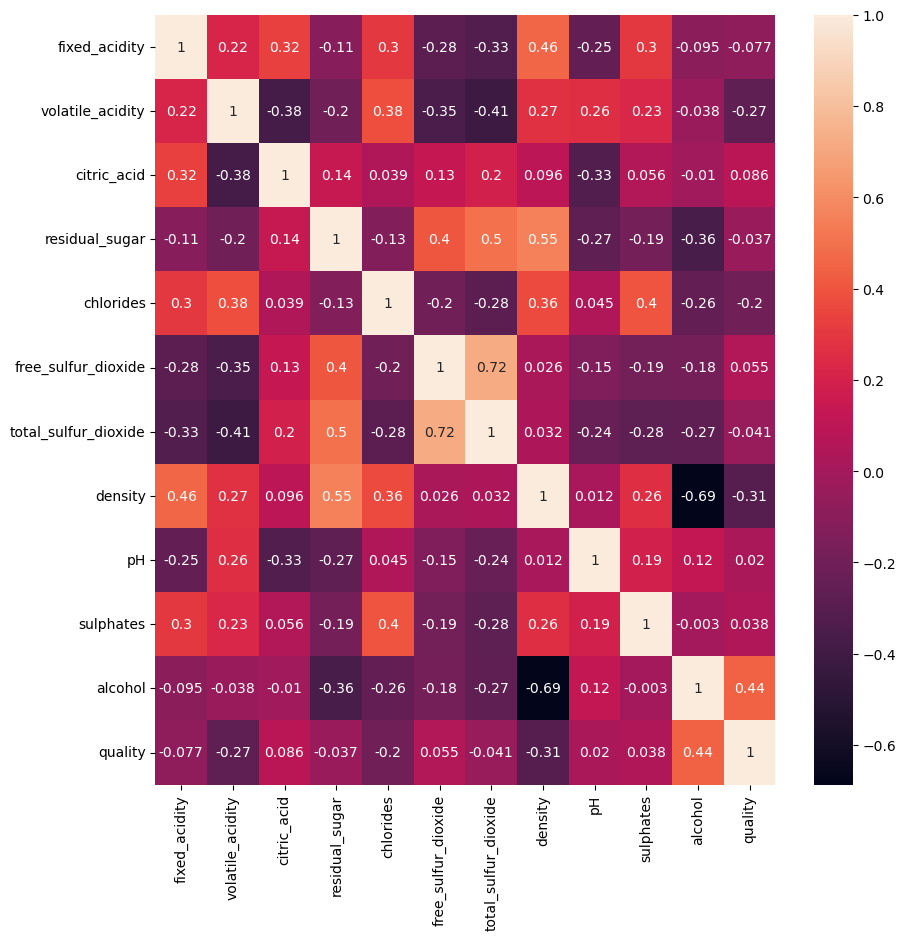

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

View summary of dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

Import Label Encoder untuk mengganti kategorikal menjadi numerikal dalam column color

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
encoder.fit(data["color"])
data["color"] = encoder.transform(data["color"])

In [12]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


Mengecek pola distribusi pada setiap kolum kecuali quality dan color dikarenakan column quality dan color merupakan ...

C:\Users\Yos Purba\AppData\Local\Temp\ipykernel_19896\2860874911.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_columns.iloc[:, i])  # Gunakan .iloc untuk akses kolom berdasarkan indeks


C:\Users\Yos Purba\AppData\Local\Temp\ipykernel_19896\2860874911.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_columns.iloc[:, i])  # Gunakan .iloc untuk akses kolom berdasarkan indeks
C:\Users\Yos Purba\AppData\Local\Temp\ipykernel_19896\2860874911.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

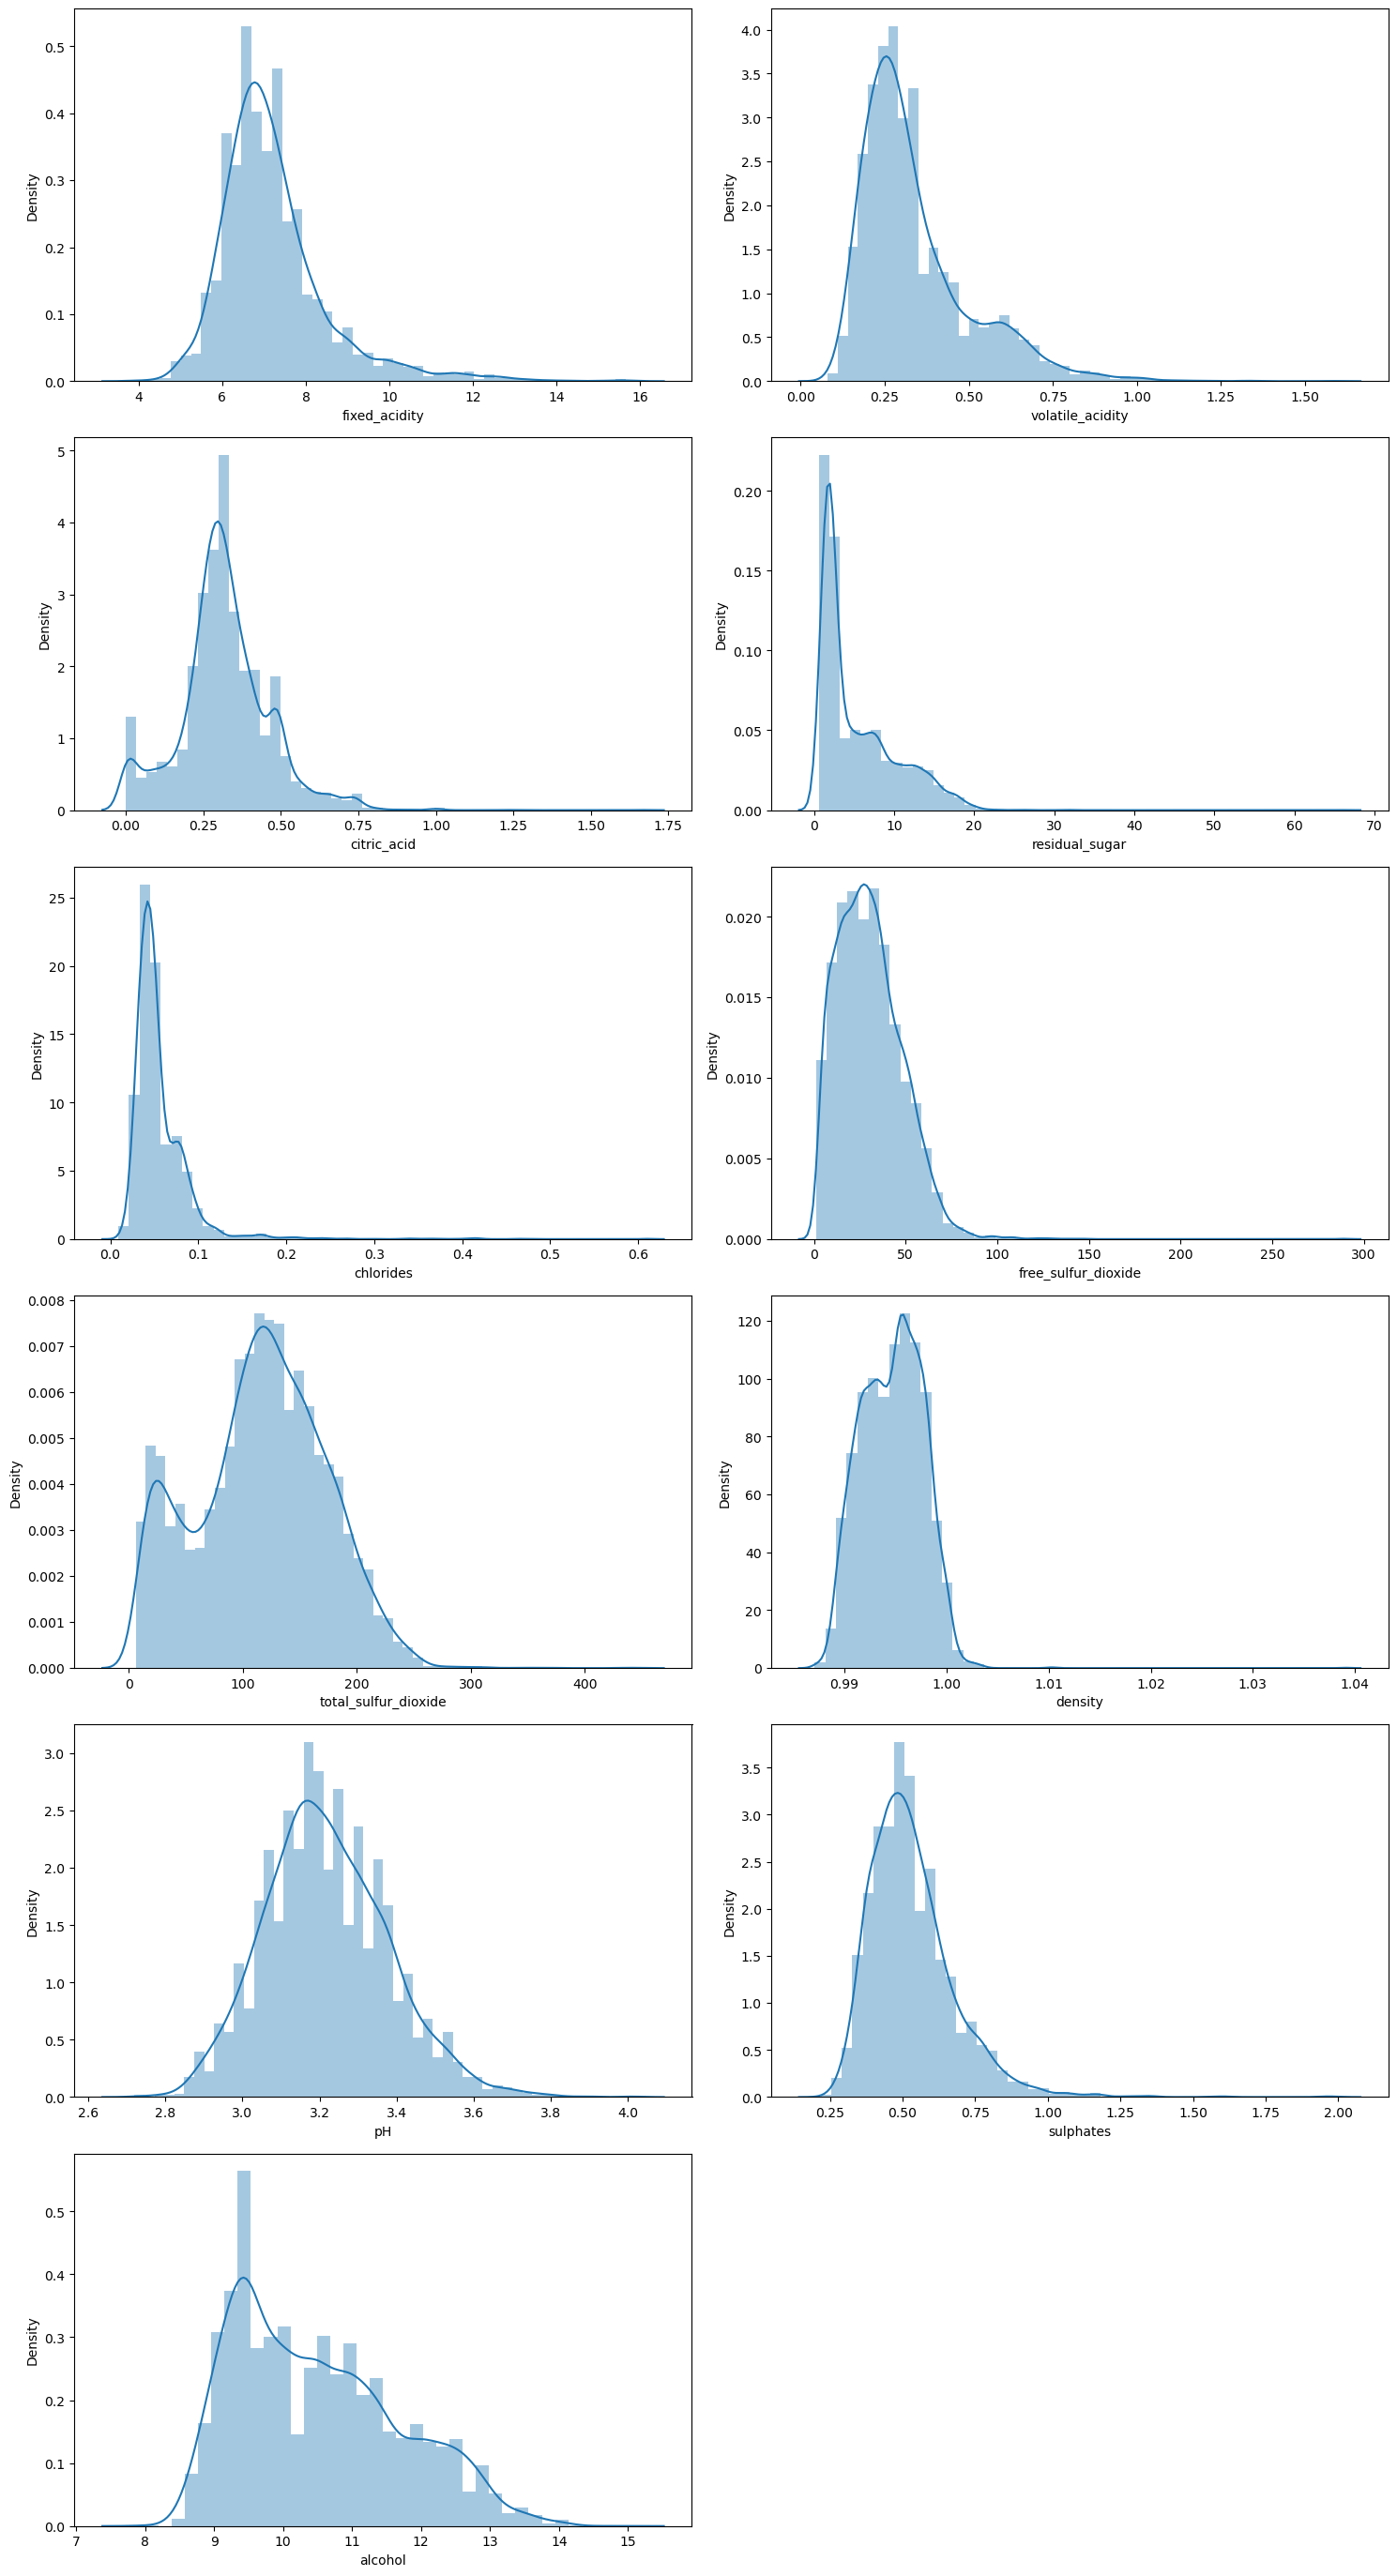

In [14]:
numeric_columns = data.select_dtypes(include=[np.number])
numeric_columns = numeric_columns.drop(["quality", "color"], axis=1)

plt.figure(figsize=(15, 50))

for i in range(len(numeric_columns.columns)):
    plt.subplot(len(numeric_columns.columns), 2, i+1)
    sns.distplot(numeric_columns.iloc[:, i])  # Gunakan .iloc untuk akses kolom berdasarkan indeks
    plt.xlabel(numeric_columns.columns[i])

plt.tight_layout()
plt.show()

Berdasarkan distribusi diatas, distribusi setiap kolom didominasi right skewed

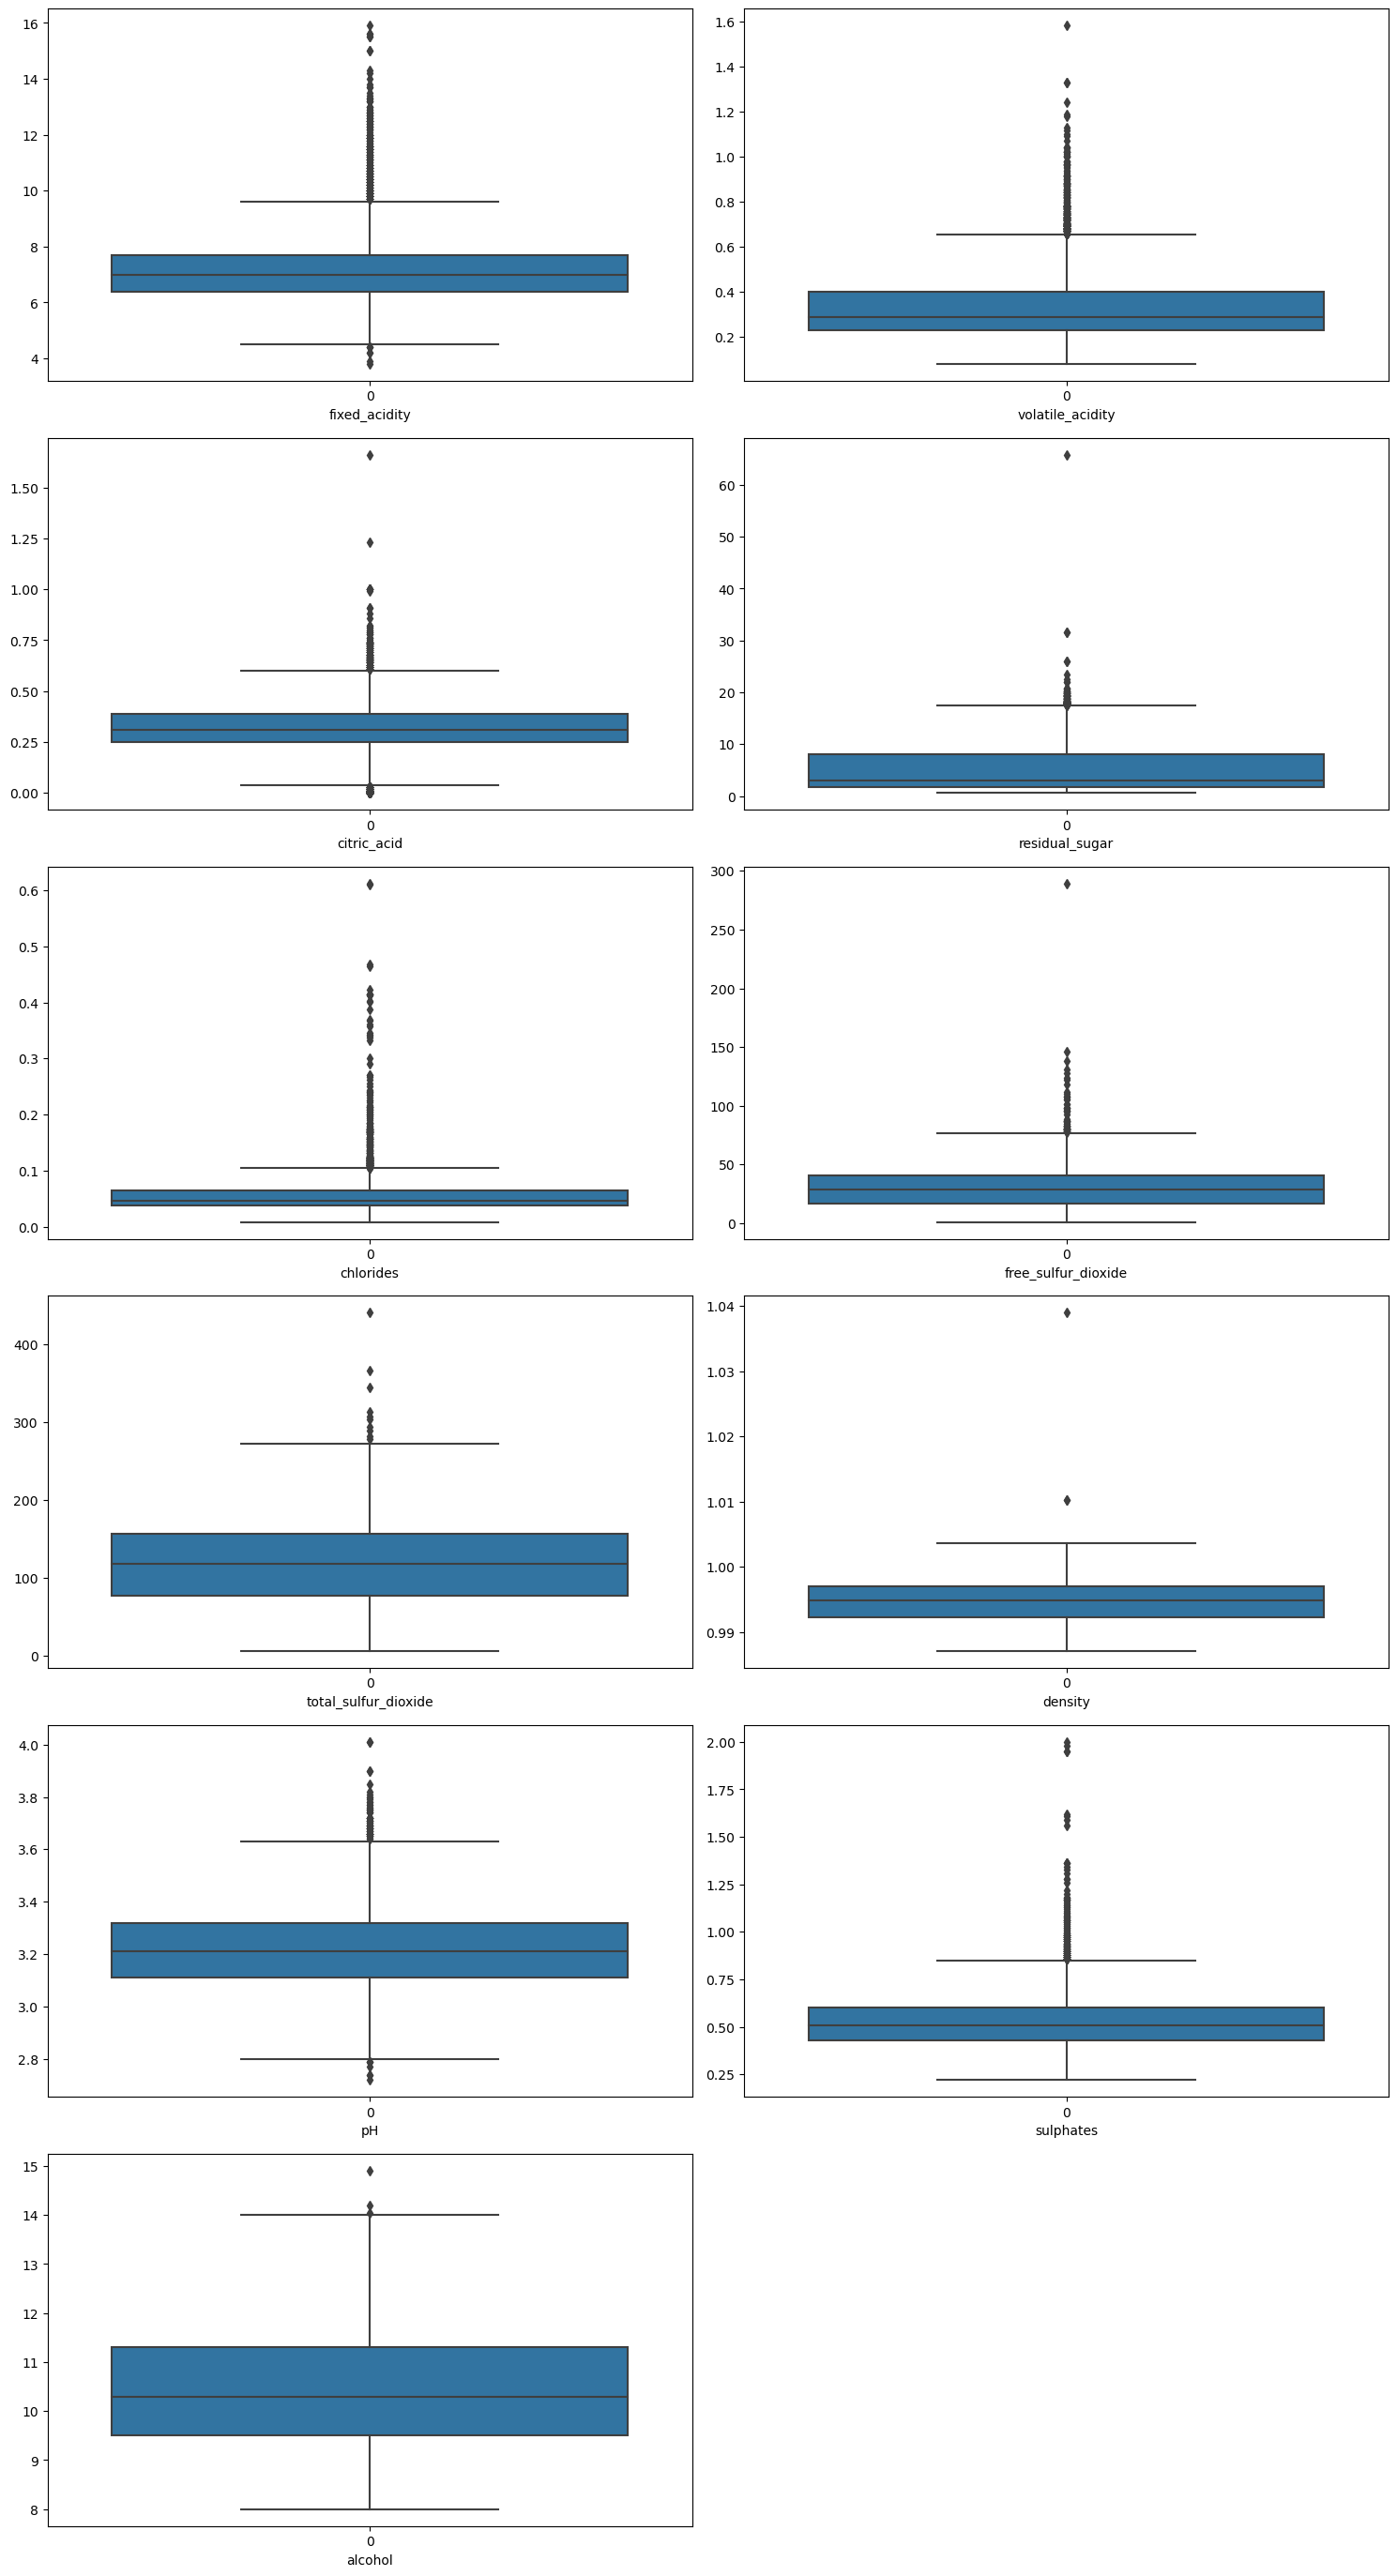

In [15]:
plt.figure(figsize=(15, 50))

for i in range(len(numeric_columns.columns)):
    plt.subplot(len(numeric_columns.columns), 2, i+1)
    sns.boxplot(numeric_columns.iloc[:, i])  # Gunakan .iloc untuk akses kolom berdasarkan indeks
    plt.xlabel(numeric_columns.columns[i])

plt.tight_layout()
plt.show()

In [16]:
from scipy import stats


for column in numeric_columns.columns:

    # Calculate Z-score
    z_scores = np.abs(stats.zscore(numeric_columns[column]))
    threshold = 3  # Batas ambang umum

    # Identify outlier based on Z-score
    outliers = np.where(z_scores > threshold)

    # Count the number of outliers
    jumlah_outlier = len(outliers[0])

    print("Jumlah Outlier untuk kolom {}: {}".format(column, jumlah_outlier))

Jumlah Outlier untuk kolom fixed_acidity: 128
Jumlah Outlier untuk kolom volatile_acidity: 95
Jumlah Outlier untuk kolom citric_acid: 28
Jumlah Outlier untuk kolom residual_sugar: 26
Jumlah Outlier untuk kolom chlorides: 107
Jumlah Outlier untuk kolom free_sulfur_dioxide: 36
Jumlah Outlier untuk kolom total_sulfur_dioxide: 8
Jumlah Outlier untuk kolom density: 3
Jumlah Outlier untuk kolom pH: 33
Jumlah Outlier untuk kolom sulphates: 75
Jumlah Outlier untuk kolom alcohol: 2


In [17]:
numeric_columns.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [18]:
numeric_columns.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit dan transformasi data
df_scaled = scaler.fit_transform(numeric_columns)
df_scaled = pd.DataFrame(df_scaled, columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
'pH', 'sulphates', 'alcohol'])

In [20]:
df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899


In [21]:
data = pd.concat([df_scaled, data['quality'], data['color']], axis=1)

In [22]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0


C:\Users\Yos Purba\AppData\Local\Temp\ipykernel_19896\2966698163.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled.iloc[:, i])  # Gunakan .iloc untuk akses kolom berdasarkan indeks
C:\Users\Yos Purba\AppData\Local\Temp\ipykernel_19896\2966698163.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

C:\Users\Yos Purba\AppData\Local\Temp\ipykernel_19896\2966698163.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled.iloc[:, i])  # Gunakan .iloc untuk akses kolom berdasarkan indeks
C:\Users\Yos Purba\AppData\Local\Temp\ipykernel_19896\2966698163.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

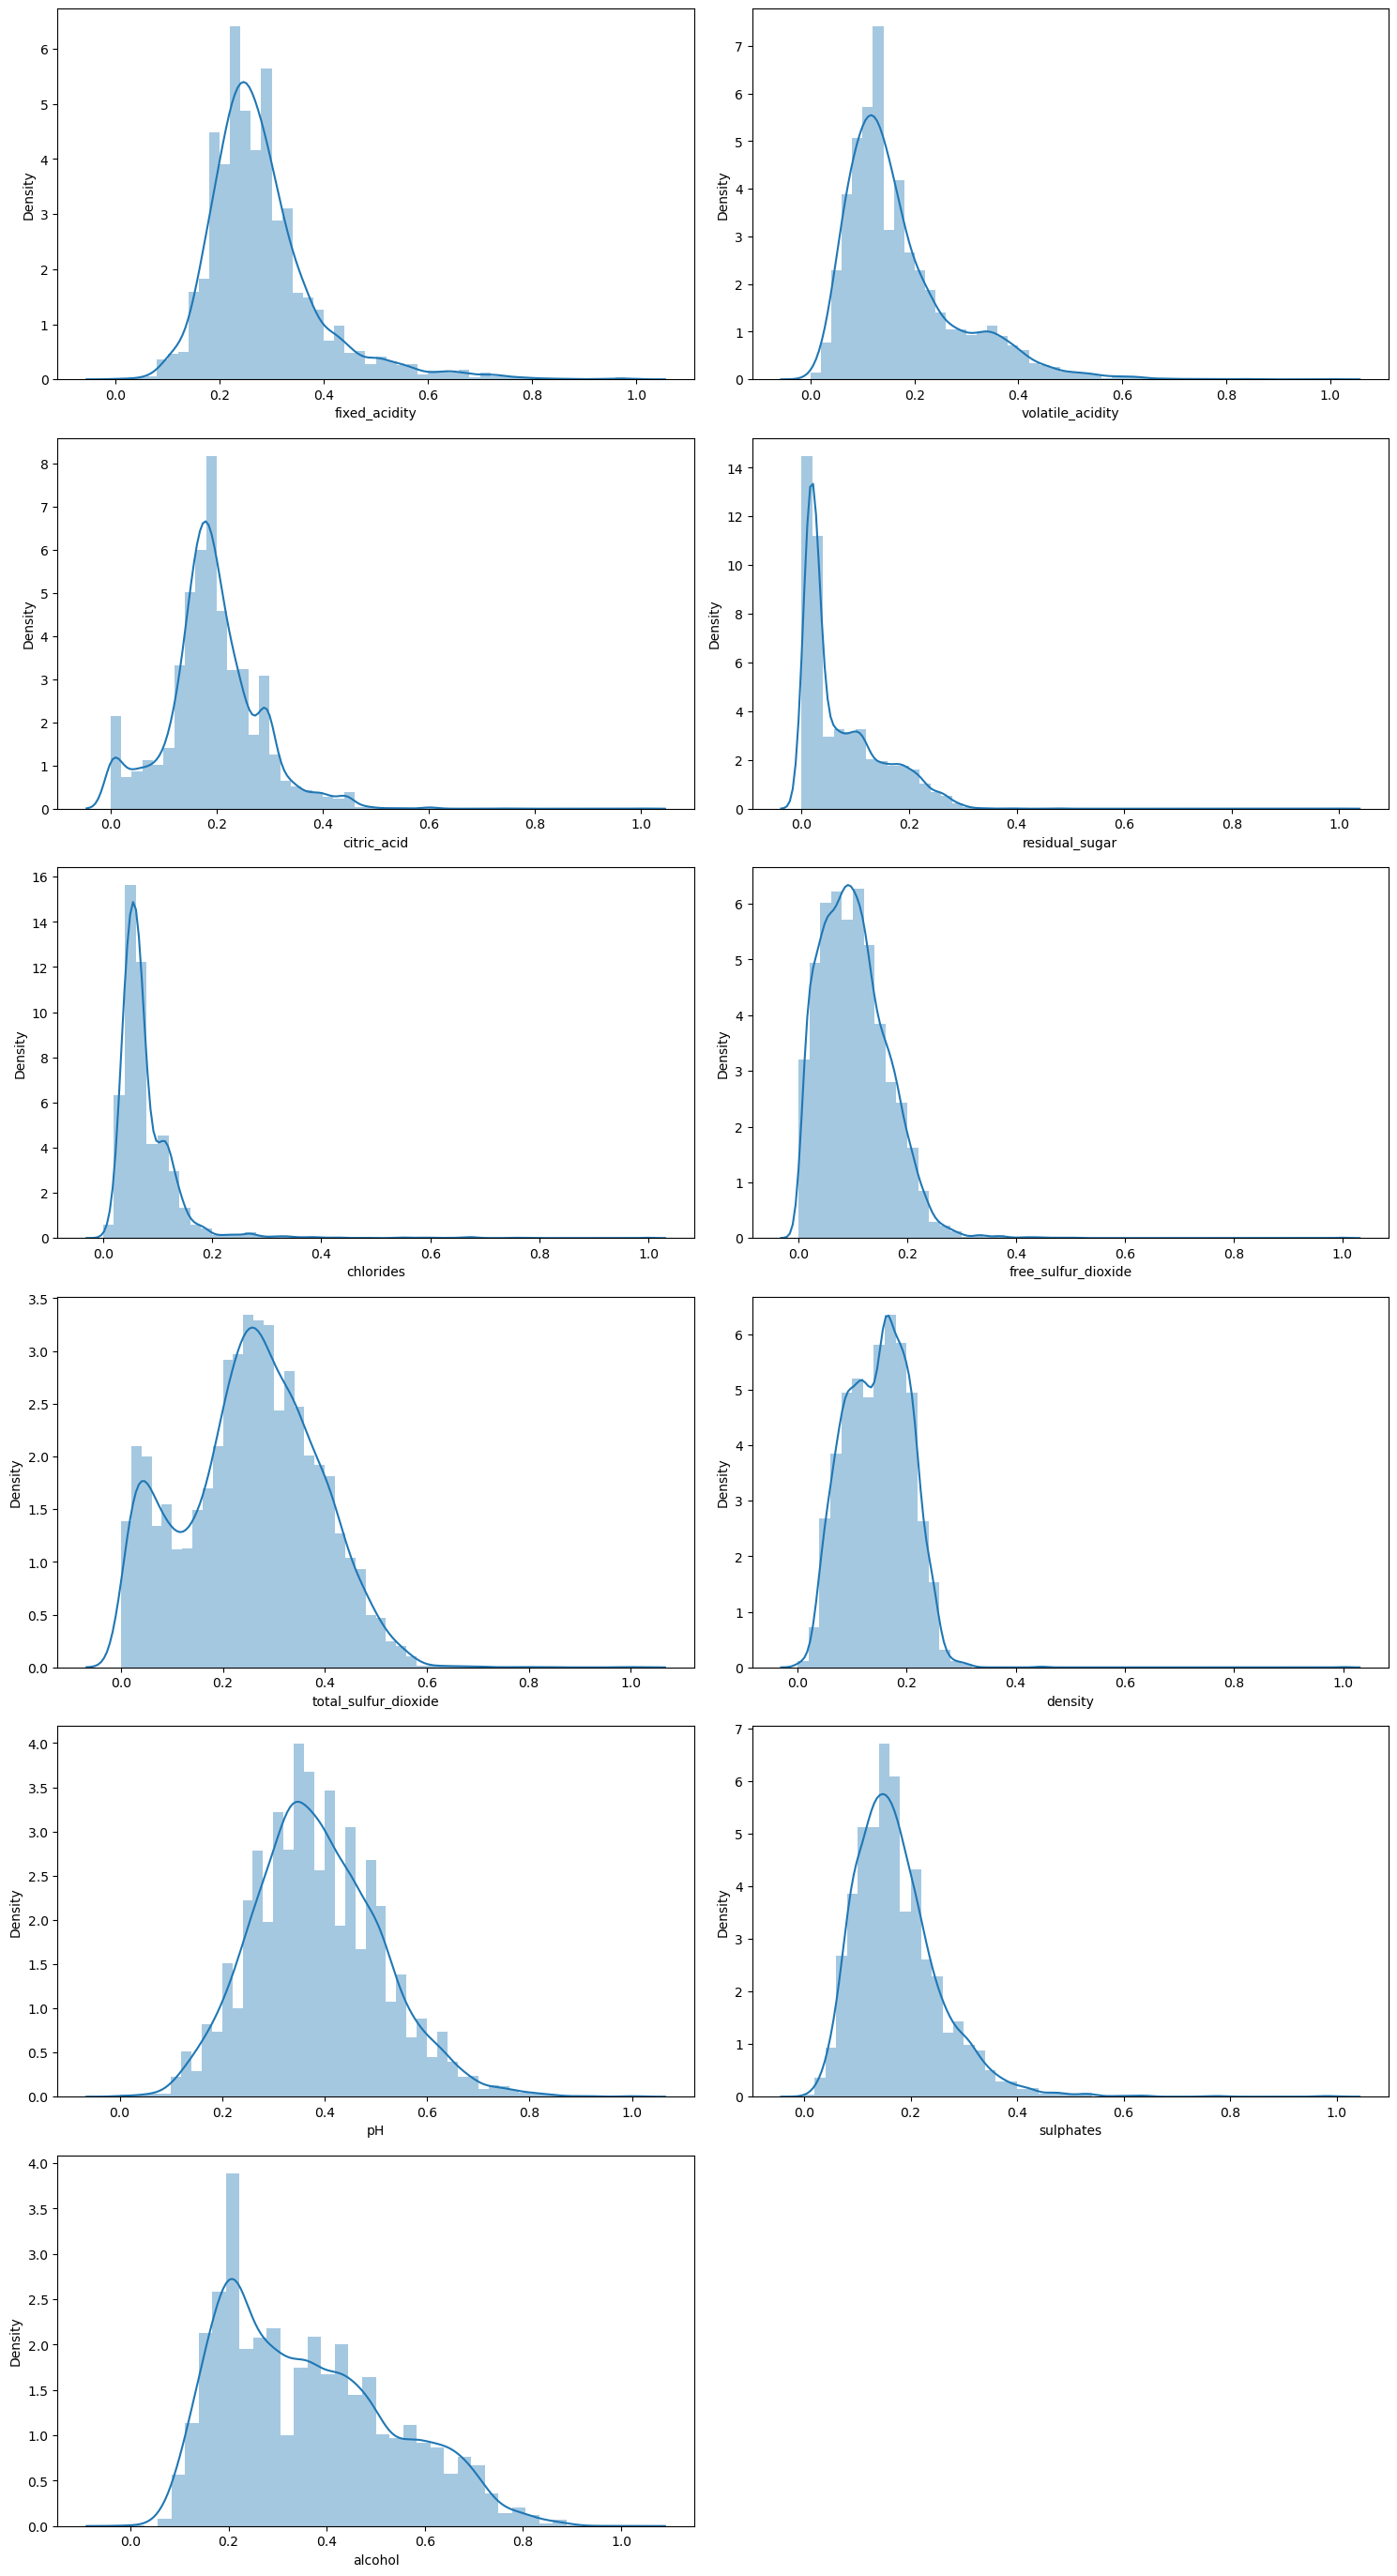

In [23]:
plt.figure(figsize=(15, 50))

for i in range(len(df_scaled.columns)):
    plt.subplot(len(df_scaled.columns), 2, i+1)
    sns.distplot(df_scaled.iloc[:, i])  # Gunakan .iloc untuk akses kolom berdasarkan indeks
    plt.xlabel(df_scaled.columns[i])

plt.tight_layout()
plt.show()

Builiding Model for KNN

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [25]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [26]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0


In [27]:
selected_features = data[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                        'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                        'pH', 'sulphates', 'alcohol', 'color']]
target_features = data['quality']

In [28]:
X = selected_features
Y = target_features

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0


Mengecek nilai akurasi pada setiap nilai k

c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11

c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11

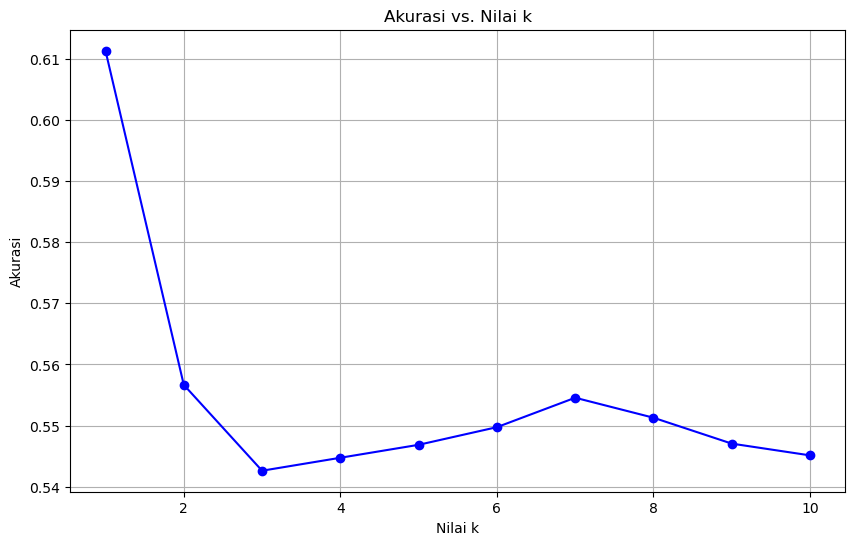

In [31]:
accuracy_scores = []
k_values = list(range(1, 11))
# Lakukan validasi silang untuk setiap nilai k dan simpan hasilnya
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Plot akurasi vs. nilai k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Akurasi vs. Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

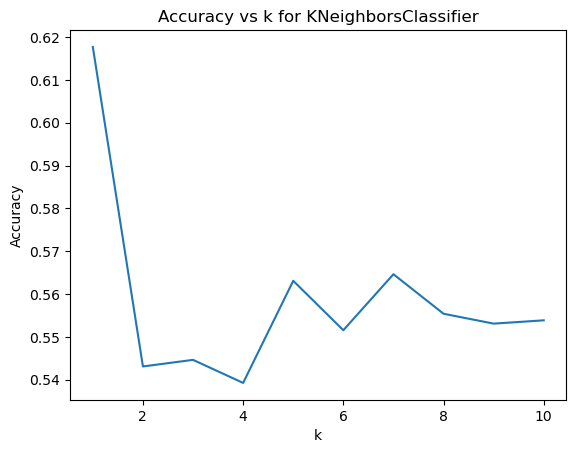

In [32]:
k_values = range(1, 11)

# Loop over k values
accuracies = []

for k in k_values:
  # Create a KNeighborsClassifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)

  # Fit the classifier to the data
  knn.fit(X_train, y_train)

  # Predict the labels for the test data
  y_pred = knn.predict(X_test)
  # Calculate the accuracy
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  
# Plot the accuracy vs k
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k for KNeighborsClassifier")
plt.show()

In [50]:
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the data
knn.fit(X_train, y_train)
# Predict the labels for the test data
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

0.5646153846153846

Building Model ANN

In [35]:
import tensorflow as tf
import keras

Mengecek nilai grid terbaik untuk membangun model ANN

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

# Define the hyperparameters to search
param_grid = {
    "solver": ["lbfgs", "adam"],
    "alpha": [1e-5, 1e-6, 1e-7],
    "hidden_layer_sizes": [(10, 5), (20, 10), (30, 15)],
}

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lb

{'alpha': 1e-06, 'hidden_layer_sizes': (30, 15), 'solver': 'lbfgs'}


c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [62]:
clf = MLPClassifier(solver='lbfgs', alpha = 1e-06, hidden_layer_sizes=(30,15), random_state=1)

In [63]:
clf.fit(X_train, y_train)

c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-06, hidden_layer_sizes=(30, 15), random_state=1,
              solver='lbfgs')

In [64]:
class_predict = clf.predict(X_test)
class_predict

array([6, 5, 7, ..., 7, 5, 7], dtype=int64)

In [65]:
accuracy = np.mean(y_test == class_predict)

print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 55.62%


Decision Tree Classifier Model

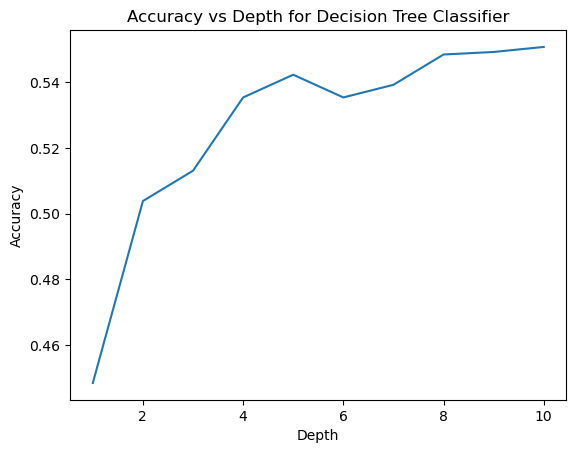

In [40]:
from sklearn.tree import DecisionTreeClassifier

dct_values = range(1, 11)

# Loop over k values
accuracies = []

for k in dct_values:
  # Create a KNeighborsClassifier with k neighbors
  dct = DecisionTreeClassifier(max_depth=k)

  # Fit the classifier to the data
  dct.fit(X_train, y_train)

  # Predict the labels for the test data
  y_pred = dct.predict(X_test)
  # Calculate the accuracy
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  
# Plot the accuracy vs k
plt.plot(dct_values, accuracies)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth for Decision Tree Classifier")
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [42]:
# Predict the test set labels
y_pred = dtc.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropi: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropi: 0.5300


In [44]:
y_pred_train = dtc.predict(X_train)

print('Training set accuracy score : {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training set accuracy score : 0.5640


Memeriksa adanya underfitting dan overfitting

In [45]:
print('Training set score : {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('Test set score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Training set score : 0.5640
Test set score: 0.5300


Visualisasi Decision Tree

[Text(0.49942952536510377, 0.9545454545454546, 'X[10] <= 0.38\ngini = 0.673\nsamples = 5197\nvalue = [24, 173, 1736, 2239, 864, 157, 4]'),
 Text(0.2579626249039201, 0.8636363636363636, 'X[1] <= 0.138\ngini = 0.608\nsamples = 3107\nvalue = [15, 125, 1474, 1245, 216, 31, 1]'),
 Text(0.1140228670253651, 0.7727272727272727, 'X[1] <= 0.105\ngini = 0.618\nsamples = 1485\nvalue = [6, 35, 481, 762, 171, 29, 1]'),
 Text(0.047175249807840124, 0.6818181818181818, 'X[10] <= 0.123\ngini = 0.609\nsamples = 846\nvalue = [3, 16, 202, 471, 129, 25, 0]'),
 Text(0.019984627209838585, 0.5909090909090909, 'X[0] <= 0.285\ngini = 0.732\nsamples = 79\nvalue = [1, 0, 27, 24, 15, 12, 0]'),
 Text(0.012298232129131437, 0.5, 'X[8] <= 0.403\ngini = 0.56\nsamples = 47\nvalue = [1, 0, 21, 23, 1, 1, 0]'),
 Text(0.006149116064565719, 0.4090909090909091, 'X[0] <= 0.252\ngini = 0.37\nsamples = 26\nvalue = [0, 0, 5, 20, 0, 1, 0]'),
 Text(0.0030745580322828594, 0.3181818181818182, 'X[5] <= 0.075\ngini = 0.165\nsamples = 22

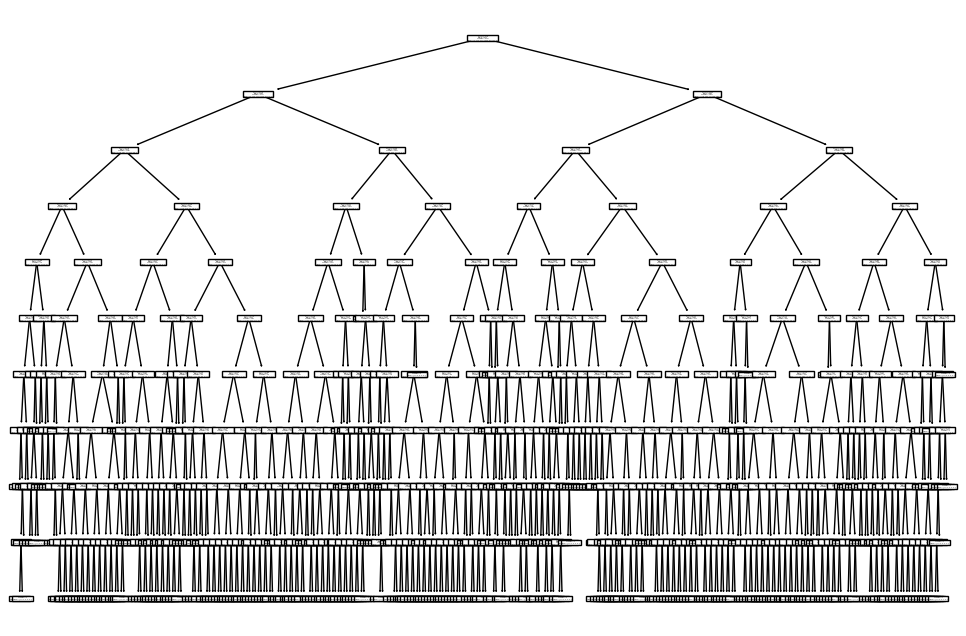

In [46]:
plt.figure(figsize=(12, 8))

from sklearn import tree

tree.plot_tree(dct.fit(X_train, y_train))

Classification report of KNN

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.23      0.07      0.11        43
           5       0.57      0.67      0.62       402
           6       0.58      0.62      0.60       597
           7       0.53      0.41      0.46       215
           8       0.40      0.06      0.10        36
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.33      0.26      0.27      1300
weighted avg       0.55      0.56      0.55      1300



c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of ANN

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.12      0.21        43
           5       0.57      0.66      0.62       402
           6       0.55      0.65      0.60       597
           7       0.50      0.30      0.38       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.38      0.25      0.26      1300
weighted avg       0.55      0.56      0.53      1300



c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report of Decission Tree Classifier

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.53      0.64      0.58       402
           6       0.55      0.61      0.57       597
           7       0.50      0.31      0.38       215
           8       0.21      0.11      0.15        36
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.26      0.24      0.24      1300
weighted avg       0.50      0.53      0.51      1300



c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Yos Purba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
